In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb


In [2]:
dataf=pd.read_csv("CleanedSuperStore.csv")
dataf.describe()

,weeknum,Year,Quantity,Sales,Discount,Profit
count,49973.000000,49973.000000,49828.000000,49973.000000,49522.000000,49973.000000
mean,31.282152,2012.778260,3.474894,246.841034,0.142962,28.738938
std,14.432617,1.098615,2.277124,489.223948,0.212402,174.881552
min,1.000000,2011.000000,1.000000,0.000000,0.000000,-6599.978000
25%,20.000000,2012.000000,2.000000,31.000000,0.000000,0.000000
50%,33.000000,2013.000000,3.000000,85.000000,0.000000,9.255200
75%,44.000000,2014.000000,5.000000,251.000000,0.200000,36.840000
max,53.000000,2014.000000,14.000000,22638.000000,0.850000,8399.976000


Sales by Region and state:
Sales vs. Profit by Category and Sub-Category:
Top Three Cities by Sales Over Time:
Bottom Three Cities by Sales Over Time:
Top Performing Sub-Categories:
Top Products by Sales vs. Profit:

C:\Users\mooha\AppData\Local\Temp\ipykernel_18348\2257500231.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


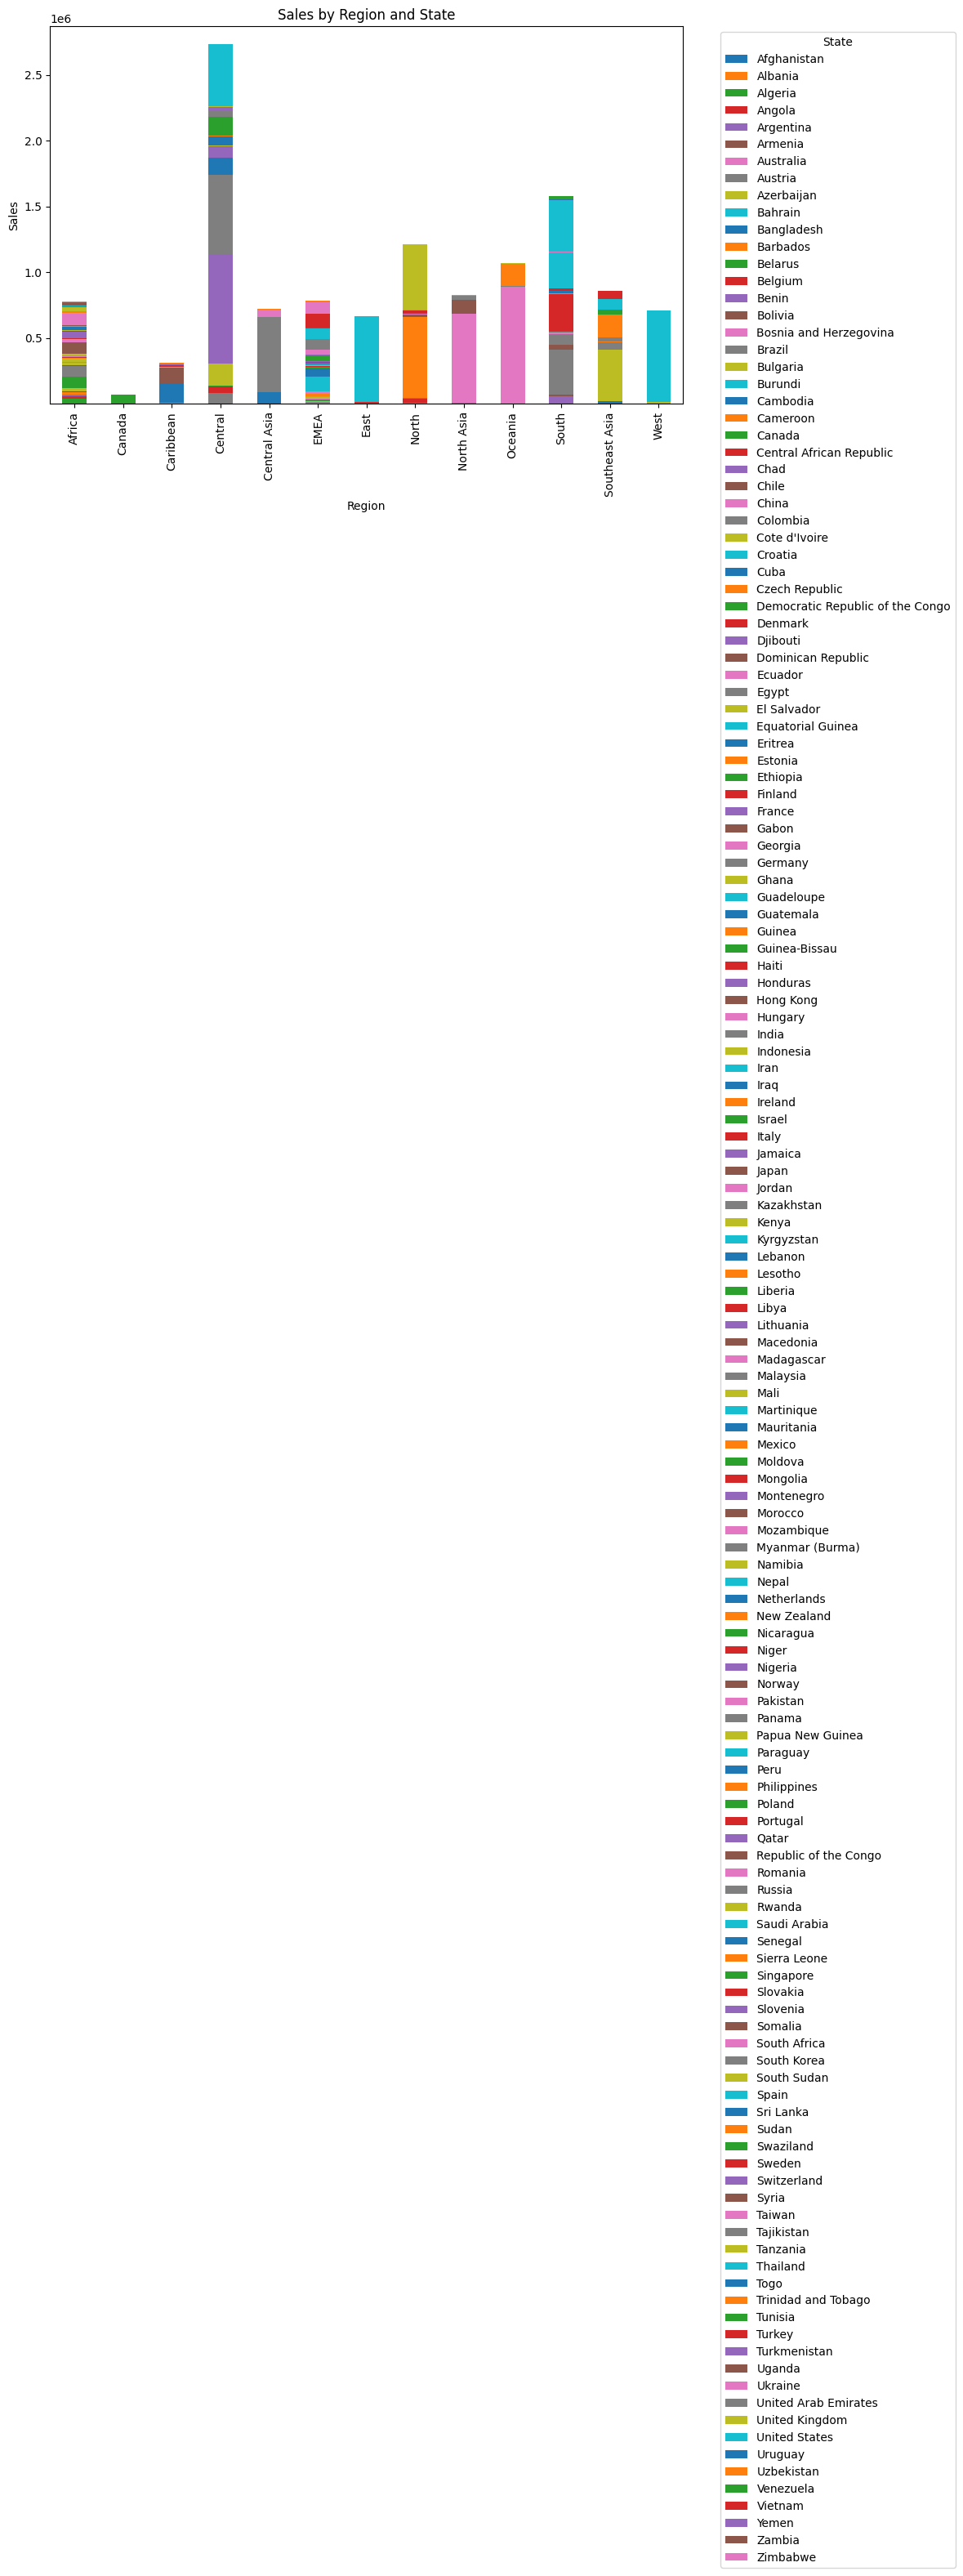

In [3]:
# Group data by Region and State
sales_region_state = dataf.groupby(['Region', 'Country'])['Sales'].sum().unstack()

# Plot
sales_region_state.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Sales by Region and State')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

                                  Sales       Profit
Category        Sub.Category                        
Furniture       Bookcases     1421985.0  160822.0529
                Chairs        1458569.0  136618.7213
                Furnishings    372818.0   45085.9970
                Tables         726207.0  -64359.0923
Office Supplies Appliances     992368.0  140423.5332
                Art            360818.0   55785.3146
                Binders        445039.0   67723.4756
                Envelopes      165359.0   28708.1794
                Fasteners       80844.0   11222.8406
                Labels          71306.0   14616.7417
                Paper          235490.0   56898.2291
                Storage       1091683.0  104278.5277
                Supplies       235302.0   22022.8351
Technology      Accessories    722980.0  124792.4403
                Copiers       1463148.0  254578.1096
                Machines       757569.0   57952.8504
                Phones        1651065.0  21029

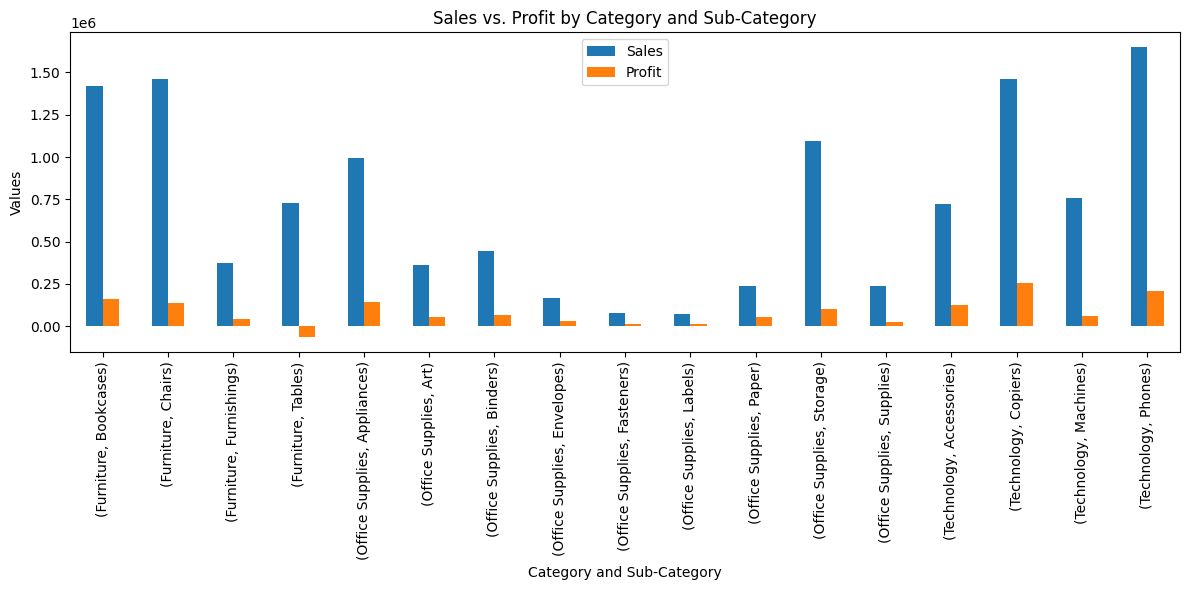

In [ ]:
# Group data by Category and Sub-Category
category_profit_sales = dataf.groupby(['Category', 'Sub.Category'])[['Sales', 'Profit']].sum()
print(category_profit_sales)
# Plot
category_profit_sales.plot(kind='bar', figsize=(12, 6))
plt.title('Sales vs. Profit by Category and Sub-Category')
plt.xlabel('Category and Sub-Category')
plt.ylabel('Values')
plt.tight_layout()
plt.show()

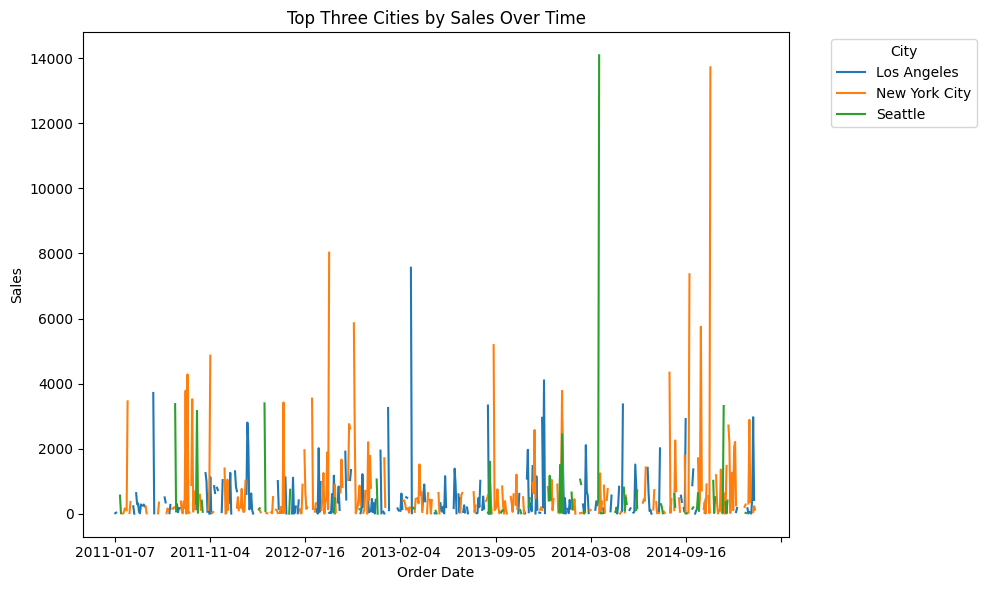

In [ ]:
# Group by City and sum Sales
top_cities = dataf.groupby('City')['Sales'].sum().nlargest(3).index
top_city_data = dataf[dataf['City'].isin(top_cities)].groupby(['City', 'Order.Date'])['Sales'].sum().unstack()

# Plot
top_city_data.T.plot(figsize=(10, 6))
plt.title('Top Three Cities by Sales Over Time')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

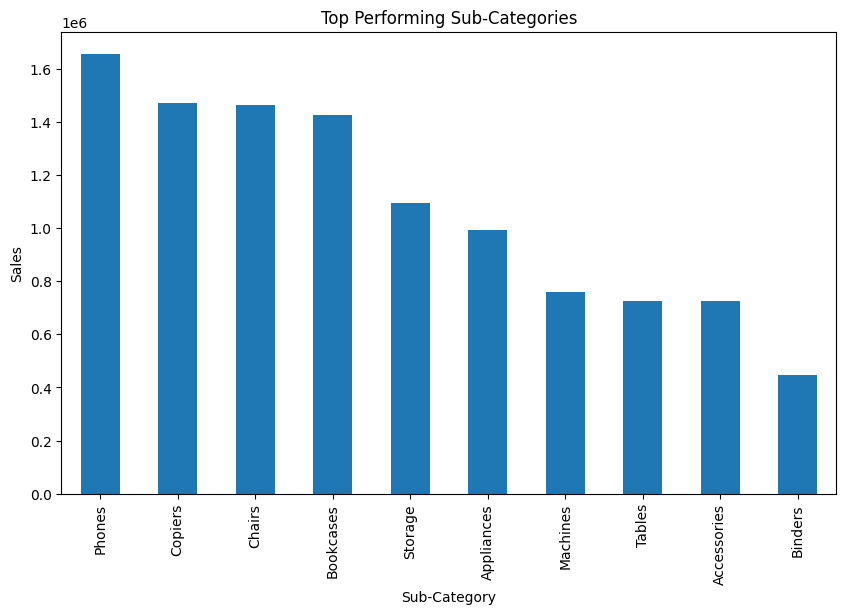

In [ ]:
# Sum Sales by Sub-Category
top_subcategories = dataf.groupby('Sub.Category')['Sales'].sum().nlargest(10)

# Plot
top_subcategories.plot(kind='bar', figsize=(10, 6))
plt.title('Top Performing Sub-Categories')
plt.xlabel('Sub-Category')
plt.ylabel('Sales')
#plt.tight_layout()
plt.show()

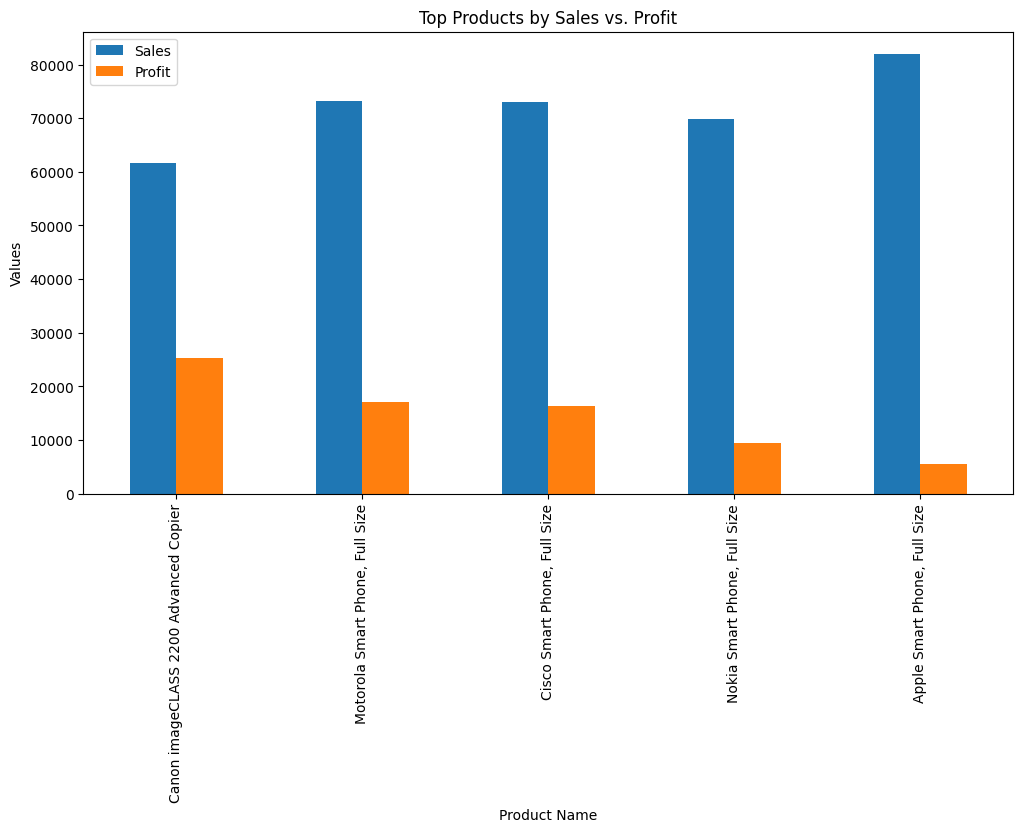

In [ ]:
# Group by Product and sum Sales and Profit
top_products = dataf.groupby('Product.Name')[['Sales', 'Profit']].sum().nlargest(5, 'Sales').sort_values(by= 'Profit', ascending=False)
# Plot
top_products.plot(kind='bar', figsize=(12, 6))
plt.title('Top Products by Sales vs. Profit')
plt.xlabel('Product Name')
plt.ylabel('Values')
#plt.tight_layout()
plt.show()

This plot shows which region had the maximum sales

In [ ]:
dataf['Region']= dataf['Region'].fillna('Unknown')
dataf['Sales']= dataf['Sales'].fillna(0)
plt.figure(figsize=(20, 6))
sb.barplot(x='Region', y='Sales', data=dataf, hue="Region")
plt.title('Bar Plot of Sales by Region')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

This pie chart is showing which country has the maximum sales from the above top two regions

In [ ]:
region1 = 'North Asia'  
region2 = 'Central Asia' 

# Filter the DataFrame for each region
filtered_df_region1 = dataf[dataf['Region'] == region1]
filtered_df_region2 = dataf[dataf['Region'] == region2]

# Group by 'State' and count occurrences for each region
state_counts_region1 = filtered_df_region1['Country'].value_counts()
state_counts_region2 = filtered_df_region2['Country'].value_counts()

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 7))

# Plotting the pie chart for Region 1
axes[0].pie(state_counts_region1, labels=state_counts_region1.index, autopct='%1.1f%%', startangle=140)
axes[0].set_title(f'Distribution of States in {region1}', fontsize=16)
axes[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Plotting the pie chart for Region 2
axes[1].pie(state_counts_region2, labels=state_counts_region2.index, autopct='%1.1f%%', startangle=140)
axes[1].set_title(f'Distribution of States in {region2}', fontsize=16)
axes[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.tight_layout()
plt.show()

There was a negative coorelation between Profit and Discount. From the plot it is visible as the discount increase the profit is going down

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(dataf['Discount'], dataf['Profit'], alpha=0.6, c='blue', edgecolor='k')
plt.title('Discount vs Profit', fontsize=16)
plt.xlabel('Discount', fontsize=14)
plt.ylabel('Profit', fontsize=14)
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()

In this plot we explored the relation between Order Priority and Shipping Mode. From the plot we can say that the most customer with the medium and low prioriy are choosing the standard class shipping mode.

In [ ]:
plt.figure(figsize=(10, 6))
sb.countplot(data=dataf, x='Order.Priority', hue='Ship.Mode', palette='Set2')
plt.title('Order Priority vs Shipping Mode', fontsize=16)
plt.xlabel('Order Priority', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Shipping Mode', fontsize=12)
plt.grid(axis='y', alpha=0.4)
plt.tight_layout()
plt.show()

In this plot we explored relation between shipping mode and cost. If a customer is choosing the First class or the Same day shipping mode they have to pay high shipping cost whereas the lowest shipping cost is for stadard class.

In [ ]:
dataf['Ship.Mode']= dataf['Ship.Mode'].fillna('Unknown')
dataf['Shipping.Cost']= dataf['Shipping.Cost'].fillna(0)
plt.figure(figsize=(5, 5))
sb.barplot(x='Ship.Mode', y='Shipping.Cost', data=dataf, hue="Ship.Mode")
plt.title('Bar Plot of Mode by Cost')
plt.xlabel('Shipping Mode')
plt.ylabel('Cost')
plt.tight_layout()
plt.show()

In this plot we explored the relation of Sales and Profit in percentage. This plot clearly shows that when the sales is high between 40-60% they are seeing high profit percent.

In [ ]:
# Calculate percentage of Sales relative to the maximum Sales
dataf['Sales_Percentage'] = (dataf['Sales'] / dataf['Sales'].max()) * 100
dataf['Profit_Percentage'] = (dataf['Profit'] / dataf['Profit'].max()) * 100

# Scatter plot for Sales Percentage vs Profit
plt.figure(figsize=(10, 6))
plt.scatter(dataf['Sales_Percentage'], dataf['Profit_Percentage'], alpha=0.6, c='blue', edgecolor='k')
plt.title('Sales Percentage vs Profit Percentage', fontsize=16)
plt.xlabel('Sales Percentage (%)', fontsize=14)
plt.ylabel('Profit Percentage (%)', fontsize=14)
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()

In this plot we are checking which category items were maximum ordered, and here customers has mostly order office supplies.

In [ ]:
heatmap_data = dataf.pivot_table(values='Quantity', index='Category', aggfunc='sum')

# Create the heatmap
plt.figure(figsize=(10, 5))
sb.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='YlGnBu', cbar_kws={'label': 'Total Quantity'})
plt.title('Heatmap of Quantity by Category', fontsize=16)
plt.xlabel('Total Quantity', fontsize=14)
plt.ylabel('Category', fontsize=14)
plt.show()